<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_4_%EB%B6%84%EB%A5%98_%EC%98%88%EC%B8%A1%EC%9D%98_%EB%B6%88%ED%99%95%EC%8B%A4%EC%84%B1_%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(15,8)})

from pandas.core.common import random_state

# 분류 예측 불확실성 추정
scikit-learn에서 많이 사용하는 인터페이스 중 하나는 분류기에 예측의 불확실 성을 추정할 수 있는 기능이다. 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지 뿐만 아니라 정확한 클래스임을 얼마나 확신하는지가 중요할 때가 많다. /예측 모델에 따라 특성 중요도를 다르게 표시하는 것과 연관된 건가./ 실제 애플리케이션에서는 오류의 종류에 따라 전혀 다른 결과를 만든다. 암을 진료하는 의료 애플리케이션을 생각해 보자. 거짓 양성 예측은 환자에게 추가 진료를 요구하겠지만 거짓 음성 예측은 심각한 진료 치료를 하지 못하게 만들 수 있다(이는 인지심리 평향인 타조효과로 나타나게 될 경우 더 큰 문제를 야기한다) 

\
 sciki-learn 분류기에서 불확실성을 추정할 수 있는 함수가 두 개 있다. decision_funtion 과 predit_porba. 대부분의 분류 클래스는 적어도 둘 중 하나를 제공하고 두 함수를 모두 제공하는 경우도 많다. 인위적으로 만든 2차원 데이터셋을 사용해 Gradient분류기의 decision_function과 predict_proba 메서드가 어떤 역할을 하는지 살펴보자.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 blue 와 red로 바꾼다.
y_named = np.array(['blue', 'red'])[y]

# 여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만든다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [61]:
# 이진 분류에서 decision_function 반환값의 크기는 (n_samples) 이며 각 샘플이 하나의 실수 값을 반환한다.
print("X_test,shpe:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test,shpe: (25, 2)
결정 함수 결과 형태: (25,)


In [62]:
# 이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도이다.
# 양수 값은 양성 클래스를 의미하며 음수 값은 음성(즉 다른) 클래스를 의미한다.

# 결정 함수 결과 중 앞부분 일부를 확인한다.
print("결정 함수: \n", gbrt.decision_function(X_test)[:6])

결정 함수: 
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [63]:
# 결정 함수의 부호만 보고 예측 결과를 알 수 있다
print("임계치와 결정 함수 결과 비교: \n", gbrt.decision_function(X_test) > 0)
print("예측: \n", gbrt.predict(X_test))

# True = red
# Fasle = blue

임계치와 결정 함수 결과 비교: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측: 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫 번째 원소이고 양성 클래스는 classes_ 의 두번째 원소이다. 그래서 predict 함수의 결과를 완전히 재현하려면 classes_ 속성을 사용하면 된다.

In [64]:
from numpy.ma.core import greater
# 불리언 값은 0, 1로 변환한다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_ 에 인덱스로 사용한다.
pred = gbrt.classes_[greater_zero]
# pred 와  gbrt.predict 의 결과를 비교한다.
print("pred는 예측 결과와 같다:", np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [65]:
# decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


decision_function 의 출력 범위가 임의의 값이라 이해하긴 어렵다. 다음 예에서 2차원 평면의 모든 점에 대해 decision_function의 값을 색으로 표현하여 앞서 본 결정 경계와 함께 그래프로 나타네보자. 훈련 데이터는 원 모양이고 테스트 데이터는 삼각형이다.

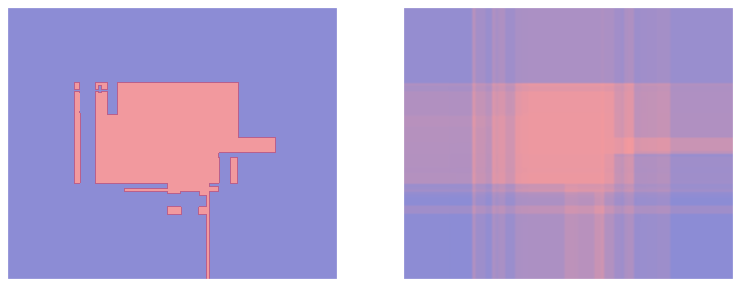

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)

score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

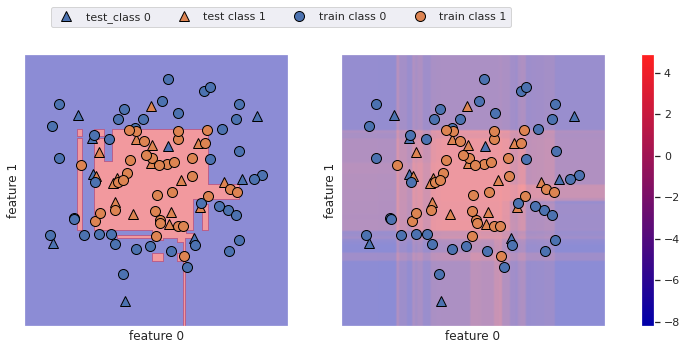

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

# 훈련 포인트와 테스트 포인트 그리기
for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

cbar = plt.colorbar(score_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test_class 0', 'test class 1', "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

## 예측 확률

predict_proba의 출력은 각 클래스에 대한 확률이고 decision_function 의 출력보다 이해하기 쉽다. 이 값의 크기는 이진 분류에서는 항상(n_samlpes, 2)

In [68]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


각 행의 첫 번째 원소는 첫 번째 클래스의 예측확률이고 두번째 원소는 두 번째 글래스의 예측확률이다. 확률이기 때문에 predict_proba 의 출력은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1이다.

In [69]:
# predict_proba 결과 중 앞부분 일부를 확인한다.
print("예측 확률:\n", gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


두 클래스의 확률 합은 1이므로 두 클래스 중 하나는 50% 이상에 확신을 가질 것이다. 그리고 바로 그 클래스가 예측값이 된다.

앞의 출력 값을 보면 분류기가 대부분의 포인트에서 비교적 강하게 확신하고 있다. 데이터에 불확실성이 얼마나 이 값에 잘 반영되는지 모델과 매개변수 설정에 달렸다. 과대적합된 모델은 혹 잘못된 예측이라도 예측의 확신이 강한 편이다. 일반적으로 복잡도가 낮은 모델은 예측의 불확실성이 더 많다. 이런 불확실성과 모델의 정확도가 동등하면 이 모델이 보정 되었다고 한다. 즉 보정된 모델에서 70% 확신을 가진 예측은 70% 정확도를 낼 것이다. 
다음 예에서 앞에서와 같은 데이터 셋을 사용해 결정 경계와 클래스 1의 확률을 그려보자.

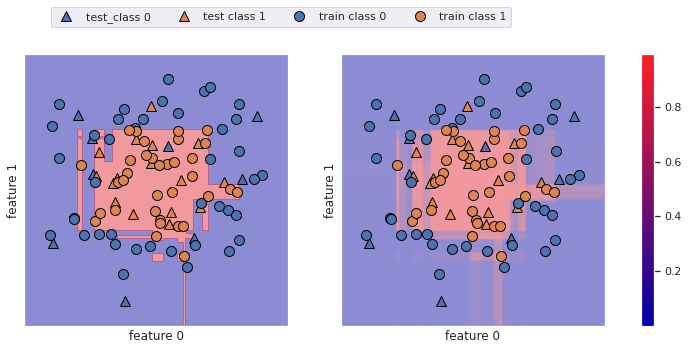

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

cbar = plt.colorbar(score_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test_class 0', 'test class 1', "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

# 경계가 잘 나타나있다.

## 다중 분류에서의 불확실성

이제까지 이진 분류에서 불확실성 추정에 관해 이야기 했다. 하지만 다르게 decision_function과 predict_proba 메서드는 다중 뷴류에도 사용할 수 있다. 클래스가 세 개인 iris 데이터셋에 적용해보자.

In [71]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 잎부를 확인합니다.
print("결정 함수 결과: \n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과: 
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


다중 분류에서 decision function 결과값의 크기는 (n_samples, n_classes) 이다.
각 열은 각 클래스에 대한 확신 점수를 담고 있다. 수치가 크면 그 클래스일 가능성이 크고, 수치가 작으면 그 클래스의 가능성이 낮다. 데이터 포인트마다, 점수들에서 가장 큰 값은 찾아 예측 결과를 재현할 수 있다.

In [72]:
print("가장 큰 결정 함수의 인덱스: \n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("예 측: \n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예 측: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


predict_proba 의 출력값 크기는 (n_samples, n_class)로 앞서 본 것과 같다.
마찬가지로 각 데이터 포인트에서 클래스 확률의 합은 1이다

In [73]:
# predict_proba 결과 중 앞부분 일부를 확인한다.
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1이 된다.
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [74]:
# predict_proba의 결과에 argmax 함수를 적용해서 예측을 재현할 수 있다.
print("가장 큰 예측 확률의 인덱스: \n", np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예 측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예 측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


정리하면 predict proba 와 decision function의 결과값 크기는 항상 (n_samples, n_classes)이다. 이진 분류의 decision function은 조금 다르다. 이진 분류에서는 dicision은 열이 하나뿐이며 양성 클래스인 classes[1] 에 대응하는 값을 가지고 있다. 
열이 n classes 개개일 때는 열을 가로질러서 argmax 함수를 적용해 얘측 결과를 재현 할 수있다. 하지만 주의할 것은 클래스가 문자열이거나 또는 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 안흥ㄹ 수 있다. predict 의 결과와 decision 이나 predict 의 결과를 비교하려면 분류기의 classes 속성을 사용해 클래스의 실제 이름을 얻어야 한다.

In [78]:

logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_ 연결:", logreg.classes_[argmax_dec_func[:10]])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_ 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
